손글씨 mnist 데이터는 형태가 단순해서 심층 신경망 모델의 성능 평가하기 어려움.
패션 mnist 데이터 통해 cnn 학습

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


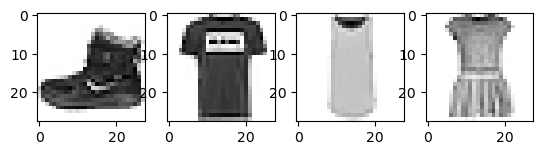

In [2]:
fig = plt.figure()
ax1= fig.add_subplot(1,4,1)
ax2= fig.add_subplot(1,4,2)
ax3= fig.add_subplot(1,4,3)
ax4= fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

In [3]:
print(train_labels[:4])

[9 0 0 3]


In [4]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

labels = train_labels[:4]
for i in labels:
    print('{} : {}'.format(i, mnist_lbl[i]))

9 : Ankle_boot
0 : T-shirt
0 : T-shirt
3 : Dress


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도: ', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.4820 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.3658 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.3301 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.3036 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2882 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2744 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2609 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2508 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.2403 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 2s 906u

사람은 이미지의 기하적 특징을 이해하고, 유사한 물체들을 떠올릴 수 있다.
인공 신경망에 입력되기 위해 펼치진 한 줄의 픽셀들을 가지고는 유의미한 정보를 만들어 낼 수 없다.

특정한 영역을 하나의 특징으로 변환하는 합성곱

In [6]:
train_images = train_images[:,:,:,np.newaxis]
test_images = test_images[:,:,:, np.newaxis]

In [8]:
#합성곱 신경망 모델 생성
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size=(3,3), padding='same',
                        filters=32),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same', filters=64),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same', filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels,
                 epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4711 - accuracy: 0.8306 - val_loss: 0.3326 - val_accuracy: 0.8813
Epoch 2/5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3044 - accuracy: 0.8886 - val_loss: 0.2819 - val_accuracy: 0.8967
Epoch 3/5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2573 - accuracy: 0.9032 - val_loss: 0.2727 - val_accuracy: 0.8973
Epoch 4/5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2216 - accuracy: 0.9186 - val_loss: 0.2640 - val_accuracy: 0.9023
Epoch 5/5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1951 - accuracy: 0.9279 - val_loss: 0.2645 - val_accuracy: 0.9081


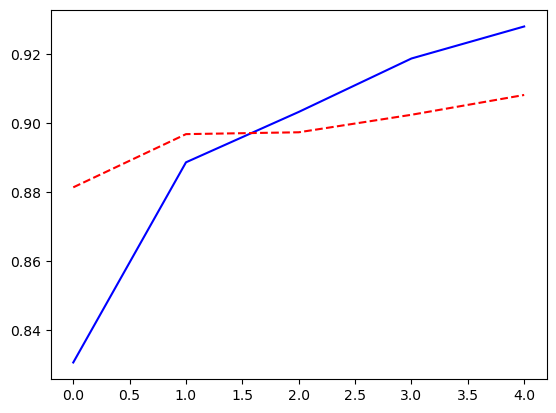

In [11]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2810 - accuracy: 0.9022 - 915ms/epoch - 3ms/step
테스트 정확도: 0.9021999835968018


In [13]:
#첫 이미지부터 25개의 이미지에 대한 정답과 예측값 비교
mnist_lbl=['T-shirt', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt', 'Sneaker', 'Bag','Ankle_boot']

images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels[:25])

1/1 [==============================] - 0s 74ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


313/313 [==============================] - 1s 3ms/step


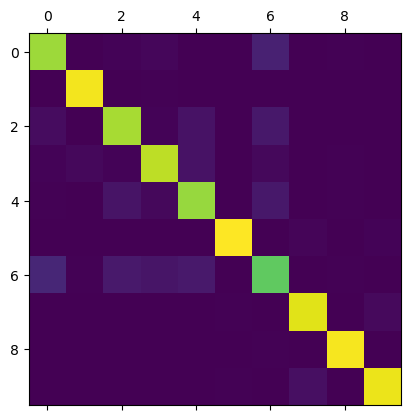

In [16]:
from sklearn.metrics import confusion_matrix
pred = np.argmax(model.predict(test_images), axis=1)
conf_mat = confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [17]:
print(conf_mat)

[[843   0  11  17   2   0  92   0   4   0]
 [  0 971   0   5   0   0   1   0   1   0]
 [ 31   1 860   8  48   0  64   0   2   1]
 [  8  21   8 892  47   0  22   0   4   0]
 [  5   1  54  20 836   0  65   0   4   0]
 [  0   0   0   0   0 989   0  14   2  10]
 [108   5  67  56  67   0 749   0   5   0]
 [  2   0   0   0   0   6   1 946   3  27]
 [  3   1   0   2   0   0   6   0 975   1]
 [  0   0   0   0   0   5   0  40   0 961]]
